In [1]:
import pandas as pd

df = pd.read_csv("data.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
df.shape

(1000, 8)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df["overall_score"] = (df["math_score"] + df["reading_score"] + df["writing_score"]) / 3
df.head()

KeyError: 'math_score'

In [6]:
df = df.rename(columns={
    "math score": "math_score",
    "reading score": "reading_score",
    "writing score": "writing_score"
})

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df["overall_score"] = (df["math_score"] + df["reading_score"] + df["writing_score"]) / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,overall_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


Matplotlib is building the font cache; this may take a moment.


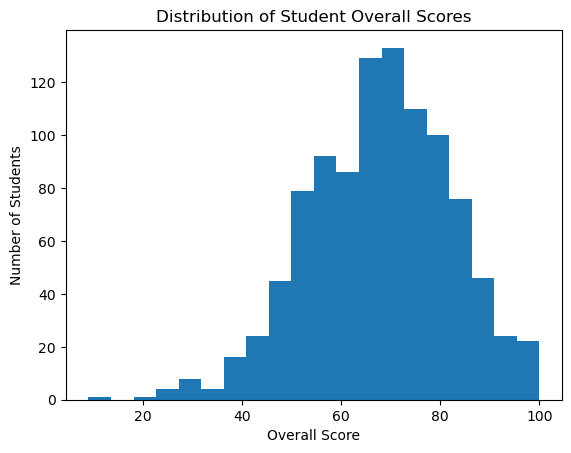

In [8]:
import matplotlib.pyplot as plt

plt.hist(df["overall_score"], bins=20)
plt.xlabel("Overall Score")
plt.ylabel("Number of Students")
plt.title("Distribution of Student Overall Scores")
plt.show()

In [9]:
df.groupby("gender")["overall_score"].mean()

gender
female    69.569498
male      65.837483
Name: overall_score, dtype: float64

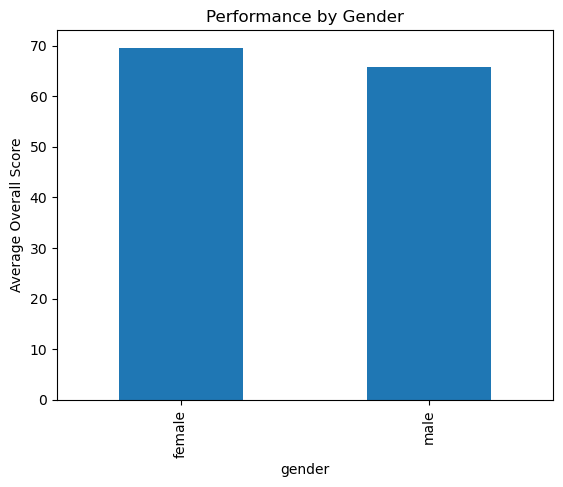

In [10]:
df.groupby("gender")["overall_score"].mean().plot(kind="bar")
plt.ylabel("Average Overall Score")
plt.title("Performance by Gender")
plt.show()

In [11]:
df.groupby("test preparation course")["overall_score"].mean()

test preparation course
completed    72.669460
none         65.038941
Name: overall_score, dtype: float64

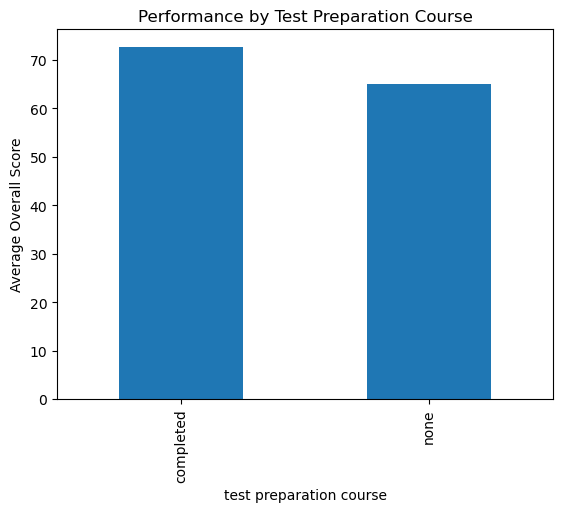

In [12]:
df.groupby("test preparation course")["overall_score"].mean().plot(kind="bar")
plt.ylabel("Average Overall Score")
plt.title("Performance by Test Preparation Course")
plt.show()

In [13]:
df.groupby("lunch")["overall_score"].mean()

lunch
free/reduced    62.199061
standard        70.837209
Name: overall_score, dtype: float64

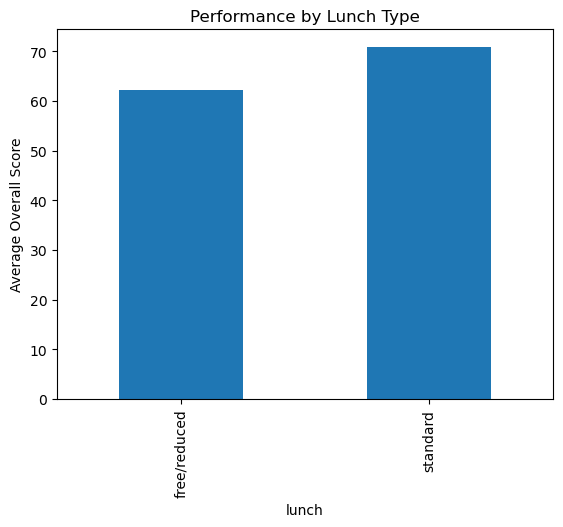

In [14]:
df.groupby("lunch")["overall_score"].mean().plot(kind="bar")
plt.ylabel("Average Overall Score")
plt.title("Performance by Lunch Type")
plt.show()

In [15]:
df.groupby("parental level of education")["overall_score"].mean()

parental level of education
associate's degree    69.569069
bachelor's degree     71.923729
high school           63.096939
master's degree       73.598870
some college          68.476401
some high school      65.108007
Name: overall_score, dtype: float64

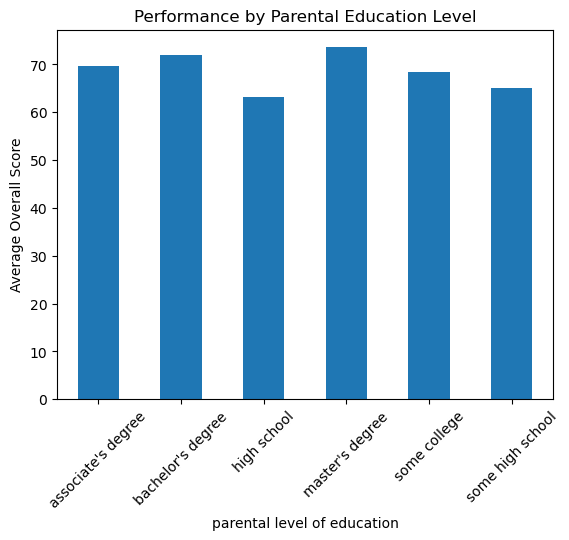

In [16]:
df.groupby("parental level of education")["overall_score"].mean().plot(kind="bar")
plt.ylabel("Average Overall Score")
plt.title("Performance by Parental Education Level")
plt.xticks(rotation=45)
plt.show()